<Figure size 7200x3600 with 0 Axes>

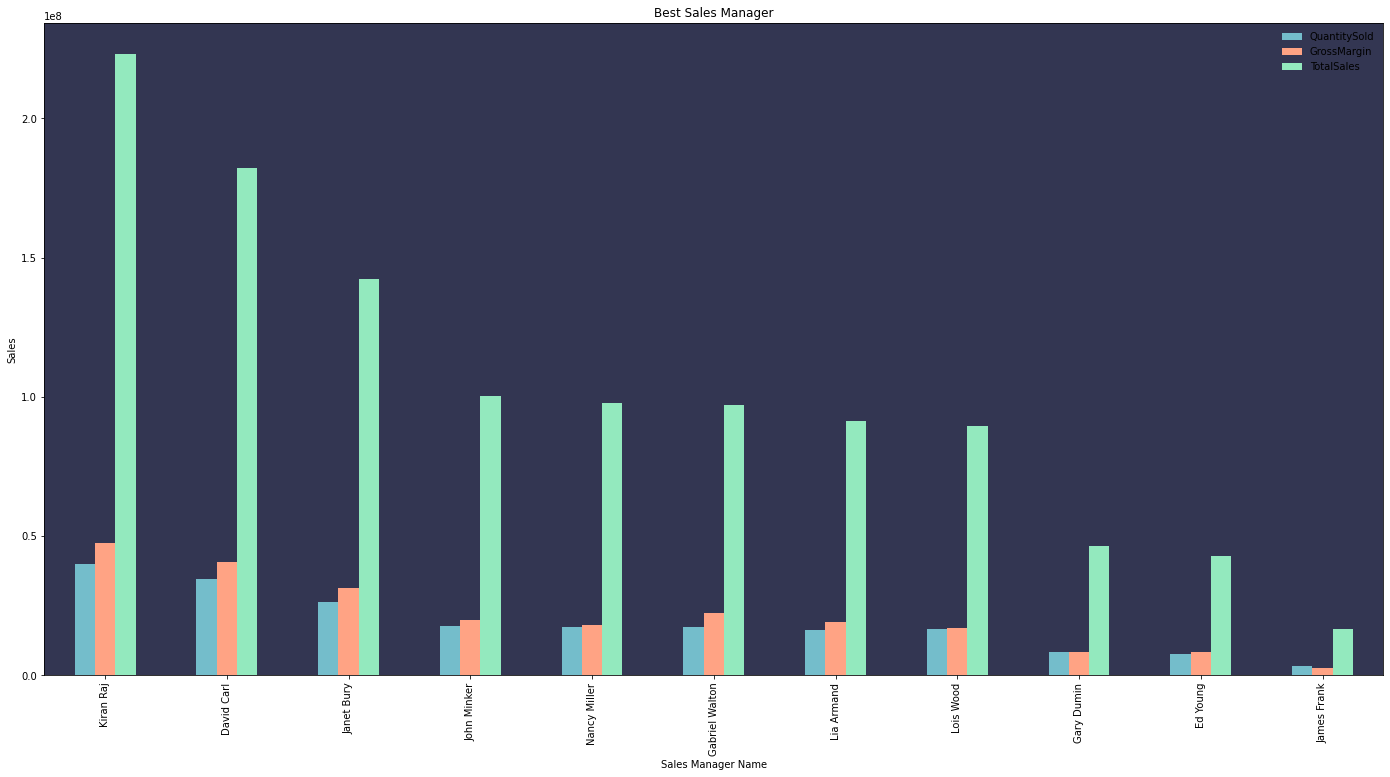

<Figure size 7200x3600 with 0 Axes>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv("./bestrunrefreshtransactions.csv", parse_dates=[0])
to_drop = ["Latitude",
          "Longitude",
           "OriginalSalesPrice",
           "Discount",
          ]
df.drop(to_drop, inplace=True, axis=1)
df['QuantitySold'] = df.QuantitySold.str.replace(';','')
df['QuantitySold'] = df.QuantitySold.str.replace(',','')
df['QuantitySold'] = df.QuantitySold.astype(float)
df['GrossMargin'] = df.GrossMargin.str.replace(';','')
df['GrossMargin'] = df.GrossMargin.str.replace(',','')
df['GrossMargin'] = df.GrossMargin.astype(float)

df["TotalSales"] = df["QuantitySold"] * df["PriceFixed"]

babyblue = '#e7f2f8'
aquamarine = '#74bdcb'
salmon = '#ffa384'
freesia = '#efe7bc'
emerald = '#3b9778'
seafoam = '#93e9be'
darkpurp = '#333652'

color_list = [aquamarine,salmon,seafoam,emerald,freesia,babyblue]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rcParams["figure.figsize"] = [24,12]
plt.rcParams['axes.facecolor'] = darkpurp
mpl.rcParams['legend.frameon'] = 'False'
mpl.rc("figure", facecolor="white")
#df[["QuantitySold", "GrossMargin"]] = df[["QuantitySold", "GrossMargin"]].apply(pd.to_numeric,errors="coerce")
#df.dtypes

#df.groupby(["SalesManagerName"]).sum().round(2).sort_values("GrossMargin", ascending=False)
#df.groupby(["SalesManagerName"]).sum().round(2).sort_values("QuantitySold", ascending=False)
#df.groupby(["LocationName","SalesManagerName"]).sum().round(2).sort_values("QuantitySold", ascending=False)
#df.groupby(["StateName"]).sum().round(2).sort_values("QuantitySold", ascending=False)
#locationquantity = df.groupby(["LocationName"]).sum().round(2).sort_values("QuantitySold", ascending=False)
df_sumbysalesm = df[['QuantitySold','GrossMargin','TotalSales','SalesManagerName']]
rep_plot = df_sumbysalesm.groupby("SalesManagerName").sum().round().sort_values("TotalSales", ascending=False).plot(kind='bar')
plt.title("Best Sales Manager")
rep_plot.set_xlabel("Sales Manager Name")
rep_plot.set_ylabel("Sales")
plt.figure(dpi=300)



#df_sumbysalesm = df[['QuantitySold','GrossMargin','TotalSales','SalesManagerName']]
#df_sumbysalesm.groupby("SalesManagerName").sum().round().sort_values("TotalSales", ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='ProductCategoryName'>

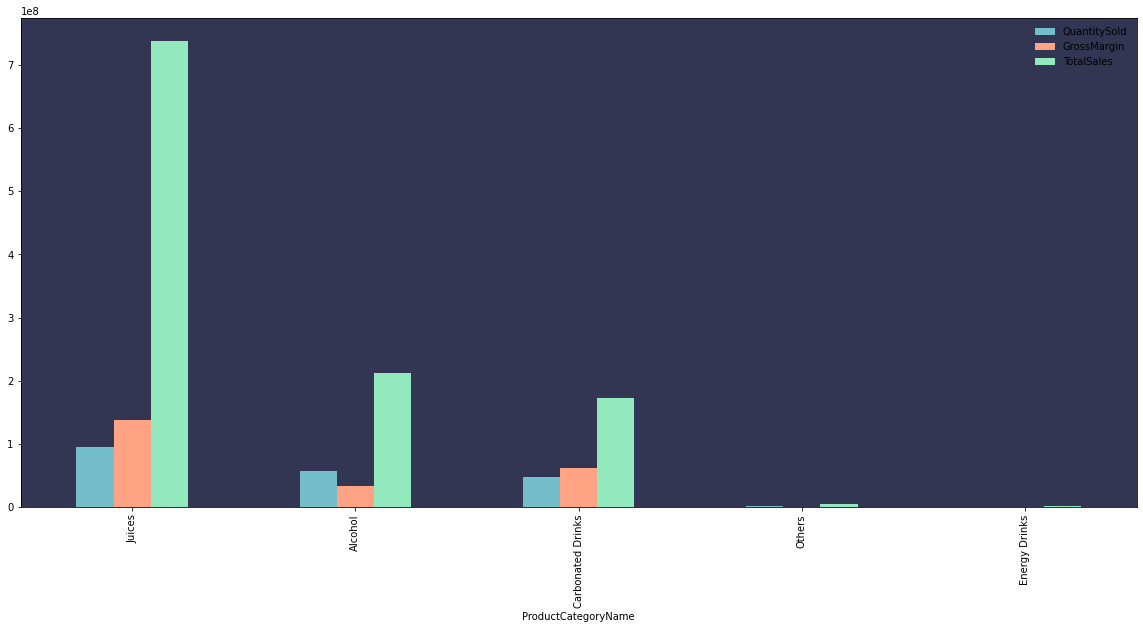

In [23]:
df_sumbyprodcat = df[['QuantitySold','GrossMargin','TotalSales','ProductCategoryName']]
df_sumbyprodcat.groupby("ProductCategoryName").sum().sort_values("TotalSales", ascending=False).plot(kind='bar')


Text(0.5, 1.0, 'Products by Name Sorted by Gross Margin')

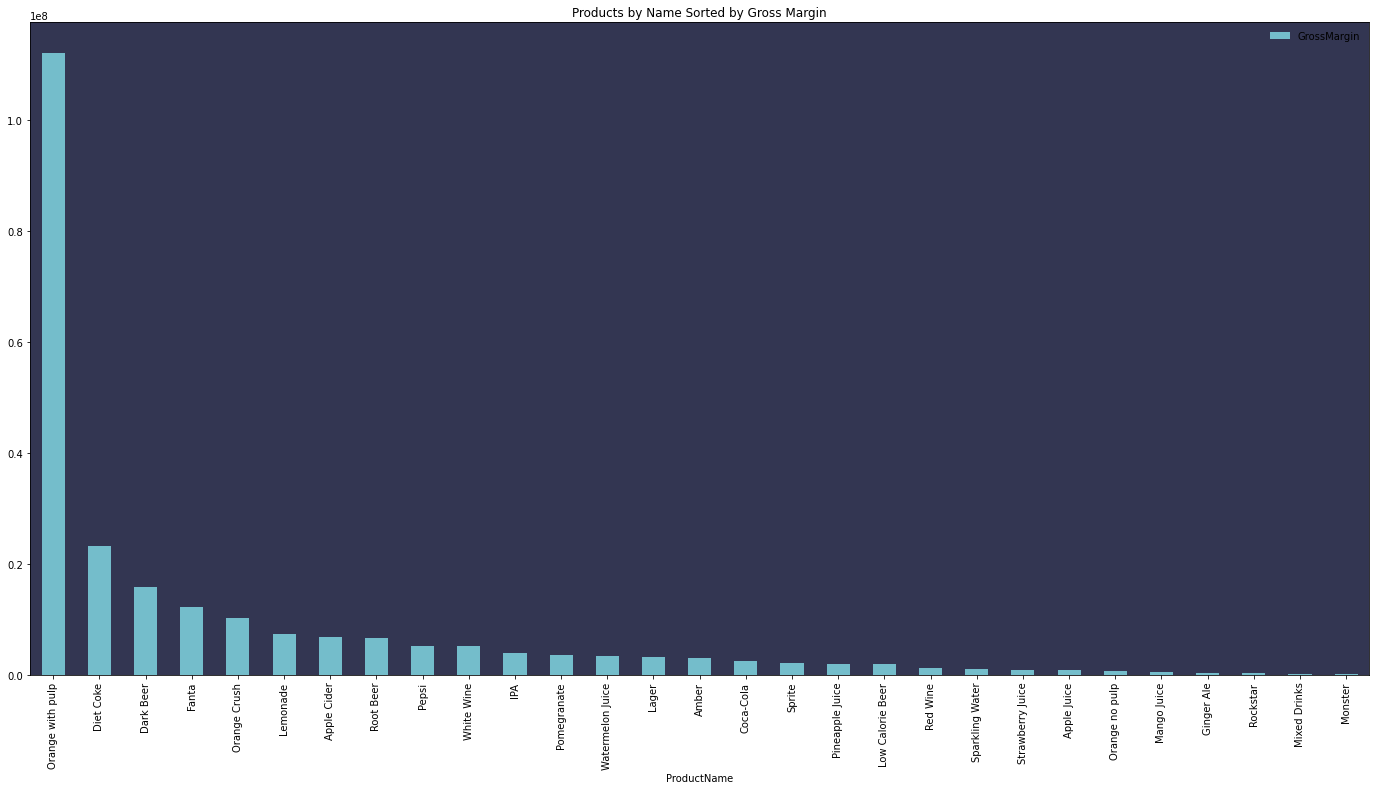

In [32]:
df_items = df[["ProductName", "GrossMargin"]]
df_items.groupby("ProductName").sum().sort_values("GrossMargin",ascending=False).plot(kind="bar")
plt.title("Products by Name Sorted by Gross Margin")

Text(0.5, 1.0, 'Total Sales by Gross Margin')

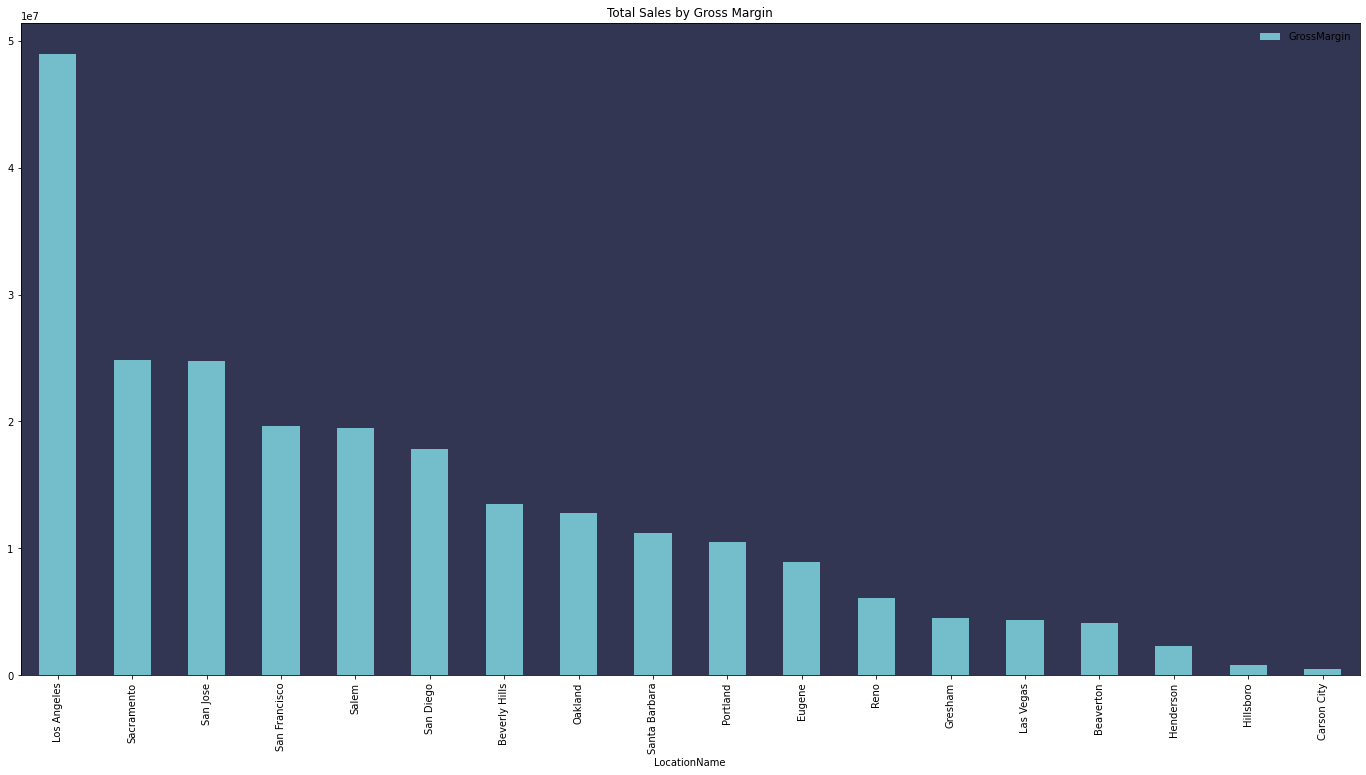

In [34]:
df_region = df[["LocationName", "GrossMargin"]]
df_region.groupby("LocationName").sum().sort_values("GrossMargin", ascending=False).plot(kind="bar") 
plt.title("Total Sales by Gross Margin")

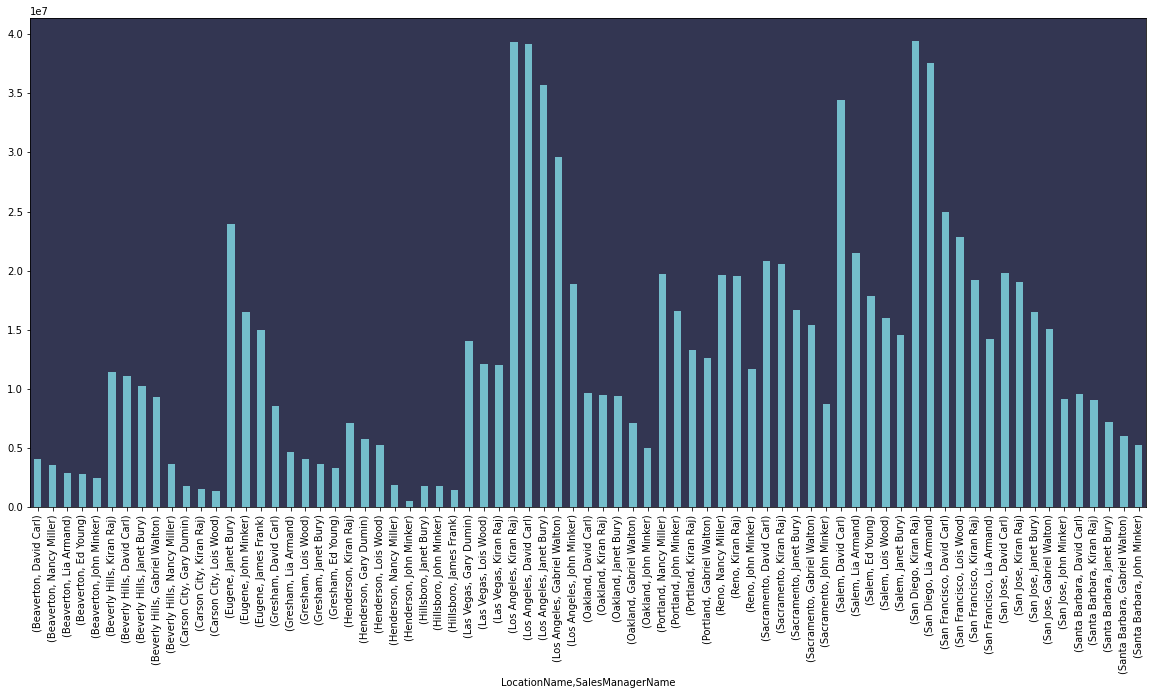

In [27]:
# Get total values of 'Region' and 'Rep', then group by 'Total Price'.
group = df.groupby(["LocationName","SalesManagerName"]).sum()
total_price = group["TotalSales"].groupby(level=0, group_keys=False)

gtp = total_price.nlargest(5)
ax = gtp.plot(kind="bar")

#draw lines and titles
count = gtp.groupby("LocationName").count()
cs = np.cumsum(count)
